# **Series Temporais**

**Aula 01**

**prof: Sergio Assuncao Monteiro, DSc**

linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

lattes: http://lattes.cnpq.br/9489191035734025

# **Conceitos Basicos de Series Temporais**

In [67]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
qtd_amostras=100
media = 1000
desvio_padrao=80

In [69]:
periodo=data=pd.date_range("2020-1-1", periods=qtd_amostras)
valor=np.random.normal(loc=media,scale=desvio_padrao,size=qtd_amostras)

In [70]:
dicionario=dict(data=periodo,valor=valor)

In [71]:
df = pd.DataFrame(dicionario)

In [72]:
df.head()

,data,valor
0,2020-01-01,959.342609
1,2020-01-02,990.982832
2,2020-01-03,1048.646277
3,2020-01-04,961.907739
4,2020-01-05,948.940629


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    100 non-null    datetime64[ns]
 1   valor   100 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


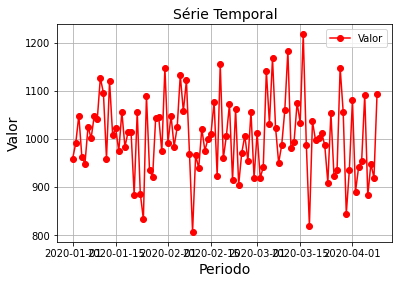

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
   
plt.plot(df['data'], 
         df['valor'], 
         color='red', 
         marker='o')

plt.title('Série Temporal', fontsize=14)
plt.xlabel('Periodo', fontsize=14)
plt.ylabel('Valor', fontsize=14)
plt.legend(labels=['Valor'],loc='best')
plt.grid(True)
plt.show()

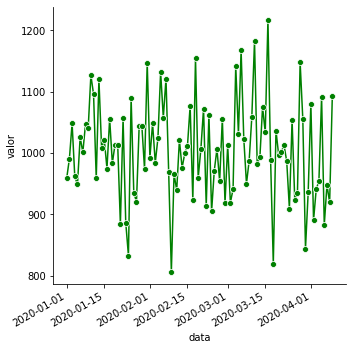

In [75]:
g = sns.relplot(x="data", 
                y="valor", 
                kind="line", 
                data=df,
                color='green', 
                marker='o')

g.figure.autofmt_xdate()

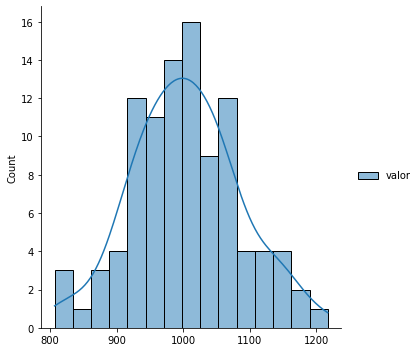

In [76]:
sns.displot(df, kde=True, 
            bins=15)

# **Serie Temporal**

**Transformar da data em índice**

In [77]:
df.head()

,data,valor
0,2020-01-01,959.342609
1,2020-01-02,990.982832
2,2020-01-03,1048.646277
3,2020-01-04,961.907739
4,2020-01-05,948.940629


In [78]:
df.set_index('data', inplace=True)

In [79]:
df.head()

,valor
data,
2020-01-01,959.342609
2020-01-02,990.982832
2020-01-03,1048.646277
2020-01-04,961.907739
2020-01-05,948.940629


**Decomposicao: modelo aditivo**

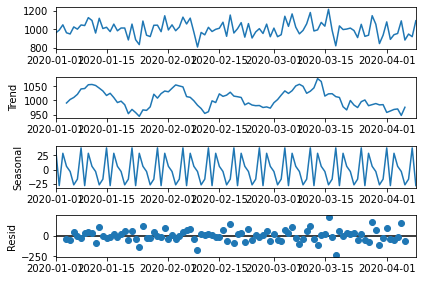

In [80]:
result = seasonal_decompose(df, model='additive')  
result.plot();                                     

**Decomposicao: modelo multiplicativo**

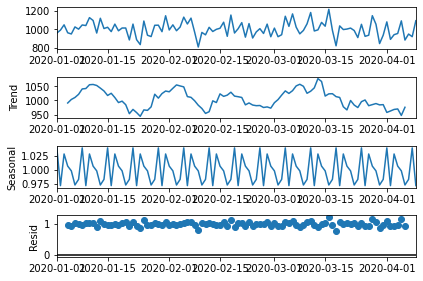

In [81]:
result = seasonal_decompose(df, model='multiplicative')
result.plot();

# **Metodos Classicos**

**Medias Moveis (Suavizacao)**

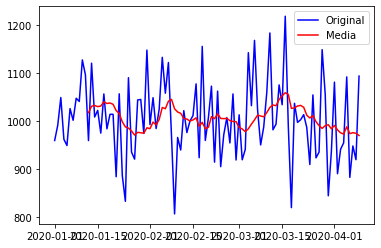

In [82]:
mm = pd.DataFrame.rolling(df,window=12,center=False).mean()
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(mm, color='red',label='Media')
plt.legend(loc='best')
plt.show()

In [83]:
#Estimativa de Pontos
n=12
np.average(df[-n:])

969.7858142611623

**Suavizacao de HoltWinters**

In [84]:
# Holt Winters 
# Suavização Exponencial Simples
from statsmodels.tsa.holtwinters import SimpleExpSmoothing  

In [85]:
# Parametros: m (periodo) e alpha - nivel de suavizacao (https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit.html#statsmodels.tsa.holtwinters.SimpleExpSmoothing.fit)
m = 12
alpha = 1/(2*m)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


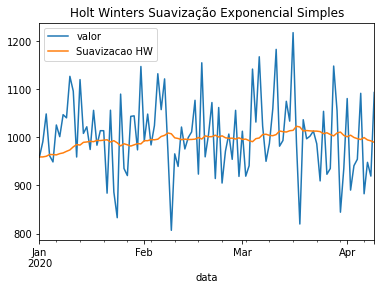

In [86]:
df['Suavizacao HW'] = SimpleExpSmoothing(df['valor']).fit(smoothing_level=alpha,
                                                          optimized=False,
                                                          use_brute=True).fittedvalues
df[['valor','Suavizacao HW']].plot(title='Holt Winters Suavização Exponencial Simples');